# Sale Analysis
## Import Necessary libryres

In [1]:
import os
import pandas as pd


### Task 1: Merge the 12 of sales data into a single CSV file

#### Merging 12 months of sales data into a single file

In [2]:
df = pd.read_csv('./files/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**pandas.read_csv** Read a comma-separated values (csv) file into DataFrame.
```Python
pandas.read_csv()
```

In [3]:
# merging all .csv files into one
path = "./files/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data"
files = [file for file in os.listdir(path)] # find all .csv files inside the folder

all_months_data = pd.DataFrame() # Create empty Data Frame

# to merge all .csv files in one
for file in files:  
    df = pd.read_csv(f"{path}/{file}")
    all_months_data = pd.concat([all_months_data, df])
    # !if don't work then look at the file
    # del ".ipynb_checkpoints" 

    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**.listdir()** is python method returns a list containing the names of the entries in the directory given by path.
```Python
import os

os.listdir(path)
```
---
A **Data frame** is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

```Python
pandas.DataFrame( data, index, columns, dtype, copy)
```
---
**Pandas Concat**

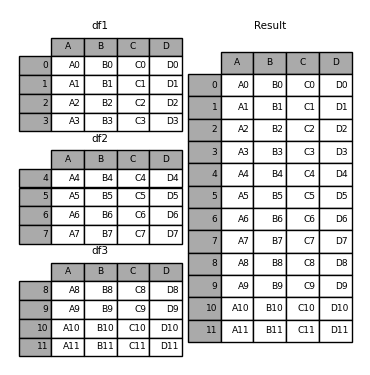

---

In [4]:
all_months_data.to_csv("./files/all_data.csv", index=False) # create .csv file 'all_data'

**.to_csv** Write object to a comma-separated values (csv) file.

```Python
DataFrame.to_csv
```
---

## Read in update dataframe

In [5]:
all_data = pd.read_csv("./files/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the data
### Find and Drop rows of NAN

In [6]:
# find all NAN rows
nan_df = all_data[all_data.isna().any(axis=1)]
len(nan_df) #>> 545 NAN rows

545

**.isna()** Detect missing values.
```Python
DataFrame.isna()
```
---
**.any()** Return whether any element is True, potentially over an axis.
```Python
DataFrame.any()
```
---
Display rows with one or more NaN values in pandas dataframe
```Python
df.isna().any(axis=1)
```
---

In [7]:
all_data = all_data.dropna(how='all') 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Drop the rows where all elements are missing.
```Python
.dropna(how='all')
```
---
Drop the rows where at least one element is missing.
```Python
.dropna()
```
---

### Find 'Or' and delete it

In [8]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
# or is Order ID	Product	Quantity Ordered	Price Each	Order Date	Purchase Address

print(len(temp_df)) #> 355 rows invalid literal for int() with base 10: 'Or'

temp_df.head()

#all_data[all_data['Order Date'].str[0:] == 'Or']

355


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Conver columns to the correct type

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])# Make int
all_data['Price Each'] =  pd.to_numeric(all_data['Price Each'])# Make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Augment data with additional columns

### Task 2: Add month column

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add a sales column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: Add a city column

In [13]:
# Let's use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


> **apply** takes a function and applies it to all values of pandas series

```Python
(lambda x: x.split(', ')[1])(all_data['Purchase Address'][0])
```
>'Dallas'

In [14]:
## Task 5:

## Question 1: What was the best month for sales? How much was earned that month?

In [15]:
# Group all position in price by month
results = all_data.groupby('Month').sum()

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,7)

Text(0.5, 0, 'Month number')

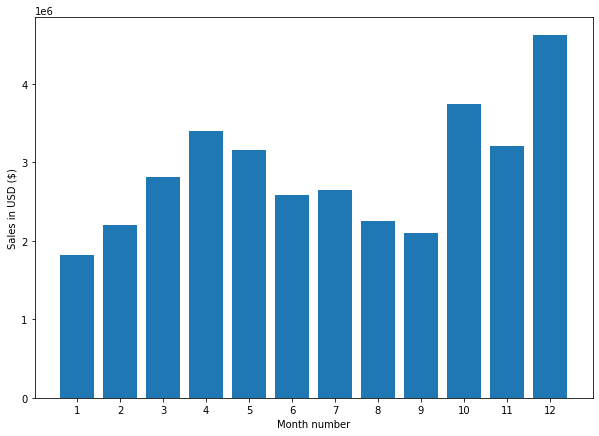

In [17]:
months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

### Question 2: What city had the highest number of sales?

In [18]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


Text(0.5, 0, 'City name')

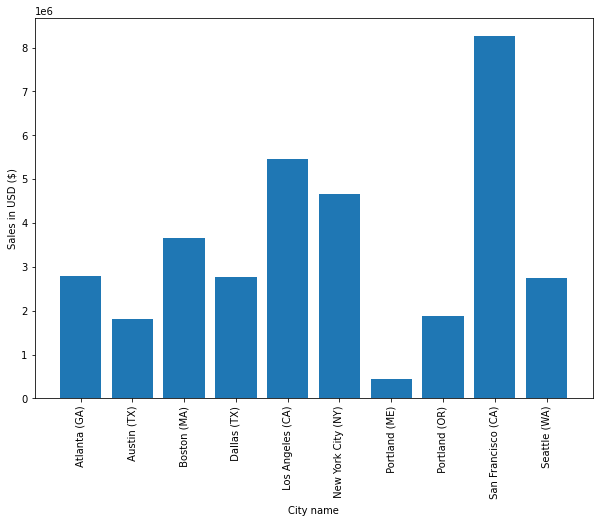

In [19]:
months = range(1, 13)

#cities =all_data['City'].unique()

cities = [x for x, y in all_data.groupby('City')] # to order that list, we can do a list comprehension

all_data['City'].unique()
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')

### Question 3: What time should we display advertisements to maximize likelihood of customers buying product?

In [20]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

> **pandas.to_datetime** - Convert argument to datetime.

In [21]:
all_data['Hour'] = all_data['Order Date'].dt.hour

all_data['Minute'] = all_data['Order Date'].dt.minute

all_data['Count'] = 1

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


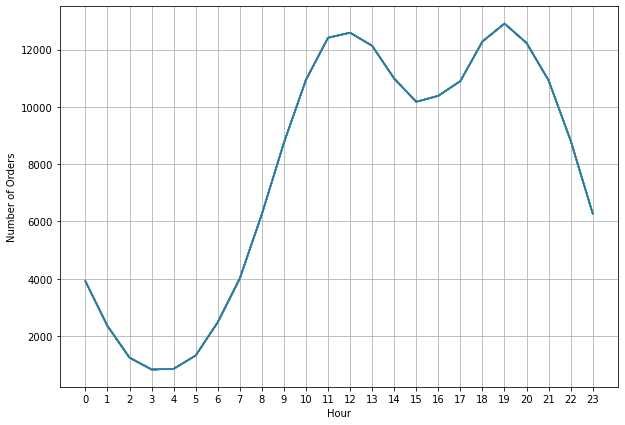

In [22]:
hours = [x for x, y in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()

#all_data.groupby(['Hour']).count()

### Question 4: What products are most often sold together?

In [23]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()


C:\Users\HARAKA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


> **pandas.duplicated()** method helps in analyzing duplicate values only. It returns a boolean series which is True only for Unique elements.

> By setting keep on False, all duplicates are True:

In [24]:
# Referenced: https://Stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

In [25]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most?

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [27]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [x for x, y in product_group]

print(quantity_ordered)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


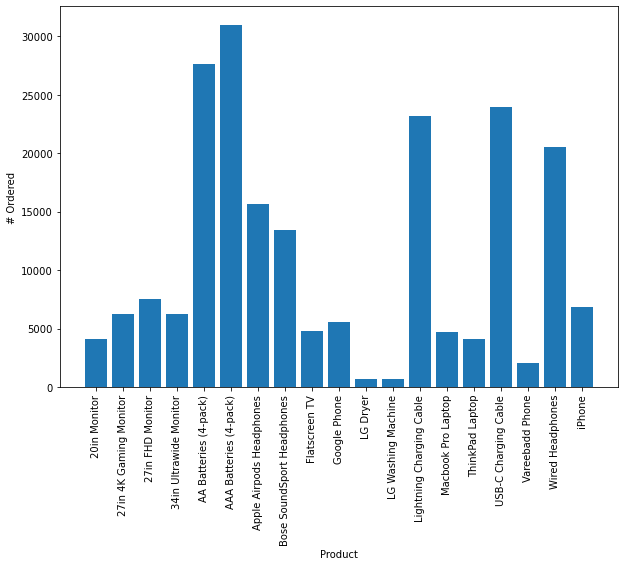

In [28]:
plt.bar(products, quantity_ordered)
plt.xlabel('Product')
plt.ylabel('# Ordered')
plt.xticks(products, rotation='vertical', size=10)
plt.show()

In [29]:
prices = all_data.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


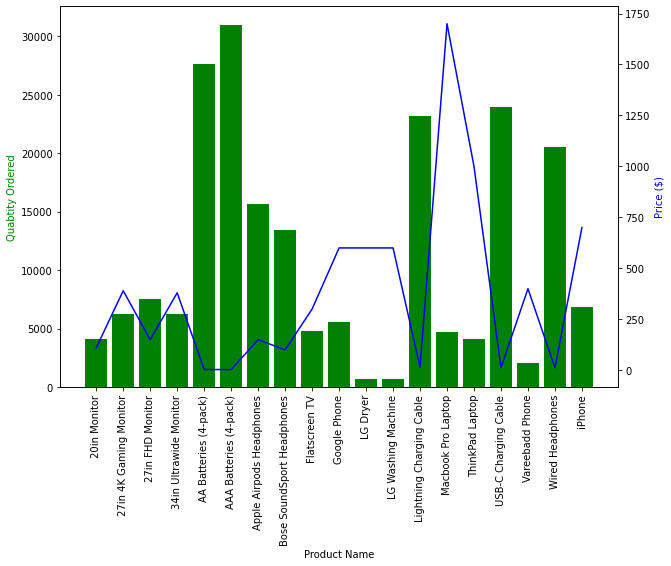

In [30]:
# 
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quabtity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical', size=10)

plt.show()